In [109]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
import branca
%matplotlib inline

In [5]:
Barrios = gpd.read_file('/mnt/d/Documentos/DS4A/process_Data/SectorCatastral/SectorCatastral.shp')
Barrios.head(10)

gid scacodigo  scatipo              scanombre  \
0    1    002598        0  EL MOCHUELO II URBANO   
1    2    004524        0         SAN PABLO BOSA   
2    3    001344        0             LOS SOCHES   
3    4    002630        0   EL PORTAL DEL DIVINO   
4    7    005103        0             SAN MIGUEL   
5    8    005615        0       LA SOLEDAD NORTE   
6  513    101301        1     HOYA SAN CRISTOBAL   
7  514    101502        1                SIBERIA   
8    5    002517        0         LUCERO DEL SUR   
9    6    002605        0                BOLONIA   

                                            geometry  
0  POLYGON ((-74.12983 4.53681, -74.12938 4.53647...  
1  POLYGON ((-74.19447 4.60992, -74.19288 4.60954...  
2  POLYGON ((-74.08600 4.50096, -74.08693 4.50062...  
3  POLYGON ((-74.09576 4.48804, -74.09586 4.48799...  
4  POLYGON ((-74.07701 4.65949, -74.07734 4.65867...  
5  POLYGON ((-74.10289 4.69350, -74.10293 4.69353...  
6  POLYGON ((-74.07163 4.57686, -74.07163 4.57662...  
7  POLYGON ((-74.05646 4.64102, -74.05643 4.64097...  
8  POLYGON ((-74.13736 4.55389, -74.13731 4.55353...  
9  POLYGON ((-74.09983 4.51031, -74.09982 4.51031...

In [6]:
avaluoMan = gpd.read_file('/mnt/d/Documentos/DS4A/initialData/Avaluo Catastral Manzana/AvaluoCatastralManzana/Avaluo_Manzana.shp')
avaluoMan.head(10)

OBJECTID MANZANA_ID CP_TERR_AR   GRUPOP_TER  AVALUO_COM  AVALUO_CAT  \
0         1  009259086          N  RESIDENCIAL    951874.0    733096.0   
1         2  001355027          N  RESIDENCIAL    973208.0    666239.0   
2         3  001355010          N  RESIDENCIAL   1100000.0    818602.0   
3         4  001355012          N  RESIDENCIAL    687104.0    469428.0   
4         5  001355021          N  RESIDENCIAL    697258.0    474940.0   
5         6  002538096          N  RESIDENCIAL    450000.0    317344.0   
6         7  002521015          N  RESIDENCIAL    450000.0    292500.0   
7         8  002521006          N  RESIDENCIAL    450000.0    292500.0   
8         9  002521014          N  RESIDENCIAL    450000.0    292500.0   
9        10  002521016          N  RESIDENCIAL    450000.0    292500.0   

                                          OBSERVACIO  \
0  Este valor corresponde a la mediana y puede di...   
1  Este valor corresponde a la mediana y puede di...   
2  Este valor corresponde a la mediana y puede di...   
3  Este valor corresponde a la mediana y puede di...   
4  Este valor corresponde a la mediana y puede di...   
5  Este valor corresponde a la mediana y puede di...   
6  Este valor corresponde a la mediana y puede di...   
7  Este valor corresponde a la mediana y puede di...   
8  Este valor corresponde a la mediana y puede di...   
9  Este valor corresponde a la mediana y puede di...   

                                 GLOBALID  SHAPE_Leng    SHAPE_Area  \
0  {70BABE94-C17D-48FC-ADD0-BEF0283A45B4}    0.002464  1.213815e-07   
1  {73AA8E80-CC4E-4DF5-887F-E1620A2356E4}    0.000684  2.818937e-08   
2  {ED6BDEF8-72FB-40F3-B4B5-A979800F5B47}    0.000875  2.915943e-08   
3  {2EBCB819-9A4E-4F41-9A8B-0578AE28045A}    0.001018  3.175301e-08   
4  {F25CC9EA-C4FA-49D6-9878-5EF2EBEE73FA}    0.002131  9.812038e-08   
5  {40A26BD4-2520-40D2-AC8F-528BE7F1220C}    0.002872  2.336448e-07   
6  {747050A4-9C20-4B6C-B8AB-92830EA084CC}    0.001492  8.719960e-08   
7  {28A87DB1-1C0F-4B05-B94B-FDE8605FD53E}    0.001722  1.043170e-07   
8  {B23223D5-E500-4FE1-ADFF-A1C1C2A25211}    0.001092  5.799999e-08   
9  {11D40468-A2BE-4711-A5AA-71FF96C2E35A}    0.001007  5.171805e-08   

                                            geometry  
0  POLYGON ((-74.12100 4.74751, -74.12101 4.74747...  
1  POLYGON ((-74.09776 4.55222, -74.09776 4.55221...  
2  POLYGON ((-74.09745 4.55194, -74.09747 4.55190...  
3  POLYGON ((-74.09723 4.55258, -74.09718 4.55258...  
4  POLYGON ((-74.09668 4.55296, -74.09673 4.55288...  
5  POLYGON ((-74.11765 4.49118, -74.11764 4.49118...  
6  POLYGON ((-74.14006 4.55912, -74.14006 4.55905...  
7  POLYGON ((-74.13961 4.55970, -74.13962 4.55962...  
8  POLYGON ((-74.14034 4.55890, -74.14036 4.55889...  
9  POLYGON ((-74.13985 4.55922, -74.13985 4.55922...

In [7]:
avaluoMan.isna().any()

OBJECTID      False
MANZANA_ID     True
CP_TERR_AR     True
GRUPOP_TER     True
AVALUO_COM    False
AVALUO_CAT    False
OBSERVACIO    False
GLOBALID      False
SHAPE_Leng    False
SHAPE_Area    False
geometry      False
dtype: bool

In [8]:
#VACIOS ID
len(avaluoMan) - avaluoMan['MANZANA_ID'].count()

1204

In [9]:
avaluoMan.dropna(subset = ['MANZANA_ID'],inplace = True)

In [10]:
avaluoMan['SECTOR_ID'] = avaluoMan['MANZANA_ID'].apply(lambda x: str(x)[:6])
avaluoMan.head()

OBJECTID MANZANA_ID CP_TERR_AR   GRUPOP_TER  AVALUO_COM  AVALUO_CAT  \
0         1  009259086          N  RESIDENCIAL    951874.0    733096.0   
1         2  001355027          N  RESIDENCIAL    973208.0    666239.0   
2         3  001355010          N  RESIDENCIAL   1100000.0    818602.0   
3         4  001355012          N  RESIDENCIAL    687104.0    469428.0   
4         5  001355021          N  RESIDENCIAL    697258.0    474940.0   

                                          OBSERVACIO  \
0  Este valor corresponde a la mediana y puede di...   
1  Este valor corresponde a la mediana y puede di...   
2  Este valor corresponde a la mediana y puede di...   
3  Este valor corresponde a la mediana y puede di...   
4  Este valor corresponde a la mediana y puede di...   

                                 GLOBALID  SHAPE_Leng    SHAPE_Area  \
0  {70BABE94-C17D-48FC-ADD0-BEF0283A45B4}    0.002464  1.213815e-07   
1  {73AA8E80-CC4E-4DF5-887F-E1620A2356E4}    0.000684  2.818937e-08   
2  {ED6BDEF8-72FB-40F3-B4B5-A979800F5B47}    0.000875  2.915943e-08   
3  {2EBCB819-9A4E-4F41-9A8B-0578AE28045A}    0.001018  3.175301e-08   
4  {F25CC9EA-C4FA-49D6-9878-5EF2EBEE73FA}    0.002131  9.812038e-08   

                                            geometry SECTOR_ID  
0  POLYGON ((-74.12100 4.74751, -74.12101 4.74747...    009259  
1  POLYGON ((-74.09776 4.55222, -74.09776 4.55221...    001355  
2  POLYGON ((-74.09745 4.55194, -74.09747 4.55190...    001355  
3  POLYGON ((-74.09723 4.55258, -74.09718 4.55258...    001355  
4  POLYGON ((-74.09668 4.55296, -74.09673 4.55288...    001355

In [12]:
avaluoSec = avaluoMan.groupby(['SECTOR_ID']).mean().reset_index()

In [13]:
avaluoSec.drop(columns=['OBJECTID','SHAPE_Leng','SHAPE_Area'],inplace=True)

In [14]:
avaluoSec

SECTOR_ID    AVALUO_COM    AVALUO_CAT
0      001101  1.110261e+06  7.629671e+05
1      001102  1.061025e+06  7.115269e+05
2      001103  1.141658e+06  7.870451e+05
3      001104  2.547066e+05  1.728447e+05
4      001106  7.770134e+05  5.363061e+05
..        ...           ...           ...
983    009263  8.300920e+05  5.993414e+05
984    009265  7.111822e+05  5.593569e+05
985    009266  1.418897e+06  9.996877e+05
986    009267  1.757494e+06  1.265812e+06
987    009268  1.394482e+05  1.221605e+05

[988 rows x 3 columns]

In [15]:
avaluoBar = pd.merge(Barrios, avaluoSec, left_on='scacodigo', right_on='SECTOR_ID', how='right')
avaluoBar

gid scacodigo  scatipo                scanombre  \
0    1002    001101        0               LAS BRISAS   
1    1133    001102        0             BUENOS AIRES   
2     276    001103        0                  VITELMA   
3     278    001104        0       MOLINOS DE ORIENTE   
4    1012    001106        0                 SAN BLAS   
..    ...       ...      ...                      ...   
983   895    009263        0            VILLA ALCAZAR   
984   478    009265        0    VEREDA SUBA CERROS II   
985   740    009266        0           RINCON ALTAMAR   
986   227    009267        0            VILLA MARIA I   
987   739    009268        0  SANTA CECILIA DE SUBA I   

                                              geometry SECTOR_ID  \
0    POLYGON ((-74.08107 4.58102, -74.08151 4.58119...    001101   
1    POLYGON ((-74.07818 4.58105, -74.07799 4.58088...    001102   
2    POLYGON ((-74.07576 4.57882, -74.07559 4.57873...    001103   
3    POLYGON ((-74.06980 4.56872, -74.06966 4.56863...    001104   
4    POLYGON ((-74.08235 4.57043, -74.08271 4.56972...    001106   
..                                                 ...       ...   
983  POLYGON ((-74.08405 4.72016, -74.08385 4.72068...    009263   
984  POLYGON ((-74.06823 4.75848, -74.06796 4.75835...    009265   
985  POLYGON ((-74.09104 4.71857, -74.09133 4.71817...    009266   
986  POLYGON ((-74.10301 4.74327, -74.09891 4.74184...    009267   
987  POLYGON ((-74.12493 4.74077, -74.12482 4.74052...    009268   

       AVALUO_COM    AVALUO_CAT  
0    1.110261e+06  7.629671e+05  
1    1.061025e+06  7.115269e+05  
2    1.141658e+06  7.870451e+05  
3    2.547066e+05  1.728447e+05  
4    7.770134e+05  5.363061e+05  
..            ...           ...  
983  8.300920e+05  5.993414e+05  
984  7.111822e+05  5.593569e+05  
985  1.418897e+06  9.996877e+05  
986  1.757494e+06  1.265812e+06  
987  1.394482e+05  1.221605e+05  

[988 rows x 8 columns]

<AxesSubplot:>

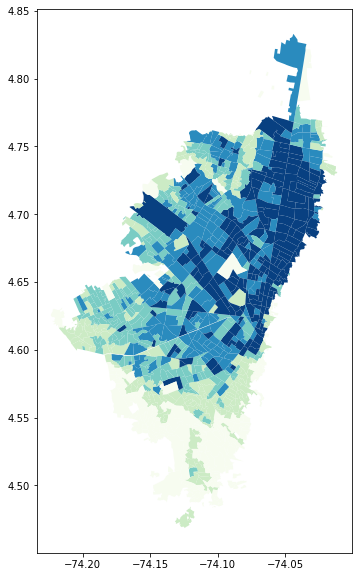

In [23]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
avaluoBar.plot(column='AVALUO_COM', scheme='Quantiles', k=5, cmap='GnBu', ax=ax)
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)

In [34]:
df = avaluoBar.to_crs(epsg=3857)

In [37]:
import contextily as ctx

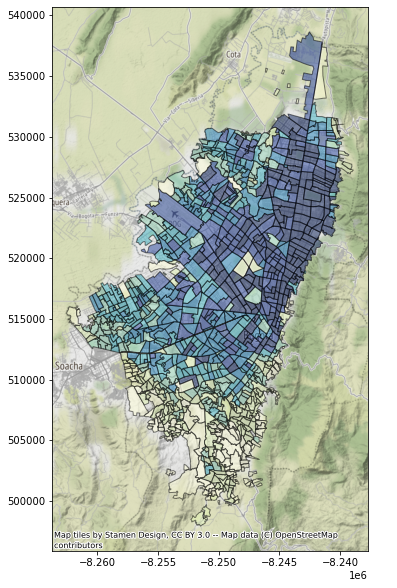

In [41]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k',column='AVALUO_COM', scheme='Quantiles', k=7, cmap='YlGnBu')
ctx.add_basemap(ax, zoom=12)

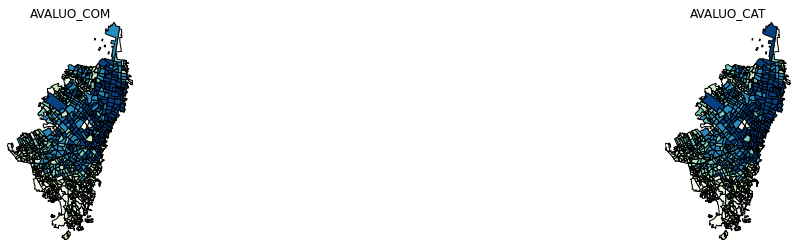

In [33]:
#esto ta feo toca arreglardf = df.to_crs(epsg=3857)
f,ax = plt.subplots(1,2,figsize=(2.16*10,4))
avaluoBar.plot(column='AVALUO_COM', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(avaluoBar.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("AVALUO_COM")
avaluoBar.plot(column='AVALUO_CAT', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(avaluoBar.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("AVALUO_CAT")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [73]:
df

gid scacodigo  scatipo                scanombre  \
0    1002    001101        0               LAS BRISAS   
1    1133    001102        0             BUENOS AIRES   
2     276    001103        0                  VITELMA   
3     278    001104        0       MOLINOS DE ORIENTE   
4    1012    001106        0                 SAN BLAS   
..    ...       ...      ...                      ...   
983   895    009263        0            VILLA ALCAZAR   
984   478    009265        0    VEREDA SUBA CERROS II   
985   740    009266        0           RINCON ALTAMAR   
986   227    009267        0            VILLA MARIA I   
987   739    009268        0  SANTA CECILIA DE SUBA I   

                                              geometry SECTOR_ID  \
0    POLYGON ((-8246667.327 510501.231, -8246716.36...    001101   
1    POLYGON ((-8246345.508 510504.090, -8246324.00...    001102   
2    POLYGON ((-8246075.945 510255.034, -8246056.89...    001103   
3    POLYGON ((-8245412.666 509127.841, -8245396.99...    001104   
4    POLYGON ((-8246809.423 509318.417, -8246849.22...    001106   
..                                                 ...       ...   
983  POLYGON ((-8246998.355 526041.164, -8246976.05...    009263   
984  POLYGON ((-8245237.990 530321.906, -8245207.59...    009265   
985  POLYGON ((-8247777.091 525863.310, -8247808.85...    009266   
986  POLYGON ((-8249109.251 528622.839, -8248652.79...    009267   
987  POLYGON ((-8251549.236 528343.786, -8251537.09...    009268   

       AVALUO_COM    AVALUO_CAT  
0    1.110261e+06  7.629671e+05  
1    1.061025e+06  7.115269e+05  
2    1.141658e+06  7.870451e+05  
3    2.547066e+05  1.728447e+05  
4    7.770134e+05  5.363061e+05  
..            ...           ...  
983  8.300920e+05  5.993414e+05  
984  7.111822e+05  5.593569e+05  
985  1.418897e+06  9.996877e+05  
986  1.757494e+06  1.265812e+06  
987  1.394482e+05  1.221605e+05  

[988 rows x 8 columns]

In [108]:

m = folium.Map(location=[4.65, -74.1],
                        zoom_start=12,
                        tiles="OpenStreetMap")
min_cn, max_cn = df['AVALUO_COM'].quantile([0.01,0.99]).apply(round, 2)

colormap = branca.colormap.LinearColormap(
    colors=['white','yellow','green','blue'],
#     #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),b
    vmin=min_cn,
    vmax=max_cn
)

colormap.caption="Avaluo Comercial Promedio"
style_function = lambda x: {
    'fillColor': colormap(x['properties']['AVALUO_COM']),
    'color': 'white',
     'weight':0.6,
    'fillOpacity':0.7
}


stategeo = folium.GeoJson(
    df,
    name='AVALUO_CAT',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['scanombre','AVALUO_COM','AVALUO_CAT'],
        aliases=['Barrio','Avaluo Comercial:','Avaluo Catastral'], 
        localize=True
    )
).add_to(m)
 
# Save to html
colormap.add_to(m)
m.save('map_avaluo.html')
m

In [110]:
#avaluo catastral 70% del comercial?
avaluoMan['REL'] = avaluoMan['AVALUO_CAT']/avaluoMan['AVALUO_COM']
avaluoMan['REL'].mean()

0.7426563618120284